In [1]:
%pip install prettytable

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from collections import Counter 
import plotly.express as px
import plotly.graph_objects as go
from prettytable import PrettyTable
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_full = pd.read_csv("synthetic_transaction_data_Dining_SMALL_w_items.csv")
df_full.head()

,transaction_id,transaction_date,card_number,card_type,merchant_name,merchant_category,merchant_state,merchant_city,transaction_status,transaction_amount,merchant_category_code,fraud_flag,cardholder_name,items,prices
0,NU9NQ8-FXXO-8NKT0S,2023-06-28 14:48,4407510646806967,visa,Dunkin',Fast Food,Connecticut,New Haven,Pending,3.98,MCC 5814,0,Daniel Harper,"['Classic Glazed Donut', 'Iced Coffee (Medium)']","[0.99, 2.99]"
1,9EA3VP-33TH-2PZAYP,2023-04-23 09:30,4452691068436345,visa,Dunkin',Fast Food,Connecticut,Bridgeport,Pending,3.98,MCC 5814,0,Tyler Wilson,"['Classic Glazed Donut', 'Iced Coffee (Medium)']","[0.99, 2.99]"
2,PPI4KT-G2XZ-071ZD5,2023-06-28 14:18,4903513850678261,visa,Dunkin',Fast Food,Utah,Salt Lake City,Successful,3.98,MCC 5814,0,Michael Sims,"['Classic Glazed Donut', 'Iced Coffee (Medium)']","[0.99, 2.99]"
3,D80K3P-B828-54PW8G,2023-03-28 09:27,4238207135693379,visa,Dunkin',Fast Food,South Carolina,Columbia,Pending,0.99,MCC 5814,0,Mr. Joshua Perry,['Classic Glazed Donut'],[0.99]
4,PEALTD-FVBA-NPJABI,2023-06-05 16:30,4649310487729230,visa,Dunkin',Fast Food,Oregon,Portland,Declined,3.98,MCC 5814,0,George Santos,"['Classic Glazed Donut', 'Iced Coffee (Medium)']","[0.99, 2.99]"


In [4]:
mname = "Chick-fil-A"
df = df_full[df_full['merchant_name']==mname].copy()

In [5]:
state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [6]:
df['merchant_state_abbr'] = df['merchant_state'].map(state_abbreviations)
state_counts = df.groupby('merchant_state_abbr')['cardholder_name'].nunique().reset_index()
state_counts.columns = ['State', 'Customer_Count']

fig = px.choropleth(state_counts, locations='State', locationmode='USA-states',
                    color='Customer_Count', scope='usa',
                    color_continuous_scale='Blues',
                    title='Number of Customers by State')

fig.show()

In [7]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
NOW = df['transaction_date'].max()
rfmTable = df.groupby('cardholder_name').agg({'transaction_date': lambda x: (NOW - x.max()).days, 'transaction_id': lambda x: len(x), 'transaction_amount': lambda x: x.sum()})
rfmTable['transaction_date'] = rfmTable['transaction_date'].astype(int)

rfmTable.rename(columns={'transaction_date': 'recency', 
                         'transaction_id': 'frequency',
                         'transaction_amount': 'monetary_value'}, inplace=True)
rfmTable = rfmTable.reset_index()

In [18]:
fig = px.histogram(rfm_data, x='recency')

fig.update_layout(
    title='Recency Histogram',
    xaxis_title='Recency',
    yaxis_title='Count'
)

fig.show()

In [9]:
fig = px.histogram(rfm_data, x='frequency')

fig.update_layout(
    title='Frequency Histogram',
    xaxis_title='Frequency',
    yaxis_title='Count'
)

fig.show()

In [19]:
fig = px.histogram(rfm_data, x='monetary_value')

fig.update_layout(
    title='Monetary Value Histogram',
    xaxis_title='Monetary Value',
    yaxis_title='Count'
)

fig.show()

In [ ]:
rfmTable['r_quartile'] = pd.qcut(rfmTable['recency'], q=4, labels=range(1,5), duplicates='raise')
rfmTable['f_quartile'] = pd.qcut(rfmTable['frequency'], q=4, labels=range(1,5), duplicates='drop')
rfmTable['m_quartile'] = pd.qcut(rfmTable['monetary_value'], q=4, labels=range(1,5), duplicates='drop')
rfm_data = rfmTable.reset_index()

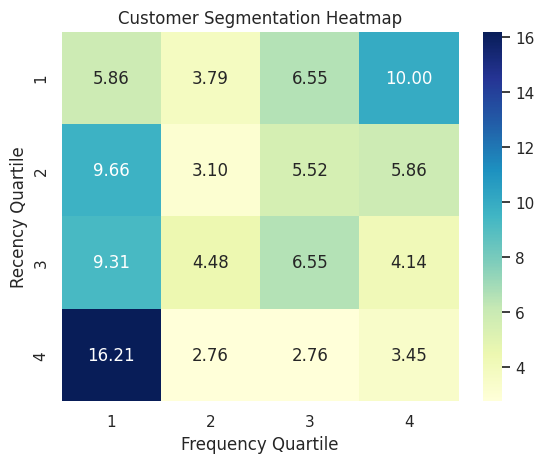

In [10]:

heatmap_data = rfm_data.groupby(['r_quartile', 'f_quartile']).size().reset_index(name='Percentage')
heatmap_data['Percentage'] = heatmap_data['Percentage'] / heatmap_data['Percentage'].sum() * 100

heatmap_matrix = heatmap_data.pivot('r_quartile', 'f_quartile', 'Percentage')

sns.set()
sns.heatmap(heatmap_matrix, annot=True, fmt=".2f", cmap="YlGnBu")


plt.title("Customer Segmentation Heatmap")
plt.xlabel("Frequency Quartile")
plt.ylabel("Recency Quartile")
plt.show()


In [11]:
rfm_data['r_quartile'] = rfm_data['r_quartile'].astype(str)
rfm_data['f_quartile'] = rfm_data['f_quartile'].astype(str)
rfm_data['m_quartile'] = rfm_data['m_quartile'].astype(str)
rfm_data['RFM_score'] = rfm_data['r_quartile'] + rfm_data['f_quartile'] + rfm_data['m_quartile']

In [12]:
rfm_score_counts = rfm_data['RFM_score'].value_counts().reset_index().rename(columns={'index': 'RFM_score', 'RFM_score': 'Count'})
fig1 = px.bar(rfm_score_counts, x='RFM_score', y='Count', labels={'RFM_score': 'RFM_score', 'Count': 'customer_count'}, title=f'{mname} RFM Score Distribution')
fig1.show()

In [23]:
rfm_data['customer_segment'] = 'Other'

rfm_data.loc[rfm_data['RFM_score'].isin(['334', '443', '444', '344', '434', '433', '343', '333']), 'customer_segment'] = 'Premium Customer' #nothing <= 2
rfm_data.loc[rfm_data['RFM_score'].isin(['244', '234', '232', '332', '143', '233', '243']), 'customer_segment'] = 'Repeat Customer' # f >= 3 & r or m >=3
rfm_data.loc[rfm_data['RFM_score'].isin(['424', '414', '144', '314', '324', '124', '224', '423', '413', '133', '323', '313', '134']), 'customer_segment'] = 'Top Spender' # m >= 3 & f or m >=3
rfm_data.loc[rfm_data['RFM_score'].isin([ '422', '223', '212', '122', '222', '132', '322', '312', '412', '123', '214']), 'customer_segment'] = 'At Risk Customer' # two or more  <=2
rfm_data.loc[rfm_data['RFM_score'].isin(['411','111', '113', '114', '112', '211', '311']), 'customer_segment'] = 'Inactive Customer' # two or more  =1

In [24]:

segment_counts = rfm_data['customer_segment'].value_counts()

table = PrettyTable()
table.field_names = ['customer_segment', 'number_of_customers']

for segment, count in segment_counts.iteritems():
    table.add_row([segment, count])

# Print the table
table

customer_segment,number_of_customers
Inactive Customer,79
At Risk Customer,64
Top Spender,53
Repeat Customer,50
Premium Customer,42
Other,2


In [25]:
# Count the occurrences of each customer segment
segment_counts = rfm_data['customer_segment'].value_counts()

# Define colors for each segment
segment_colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow']

# Create the bar chart using Plotly
fig = go.Figure(data=go.Bar(
    x=segment_counts.index,
    y=segment_counts.values,
    marker=dict(color=segment_colors)
))

# Update layout
fig.update_layout(
    title='Customer Segments',
    xaxis=dict(title='Segment'),
    yaxis=dict(title='Count')
)

# Display the bar chart
fig.show()


In [31]:
avg_monetary = rfm_data.groupby('customer_segment')['monetary_value'].mean().reset_index()

fig = go.Figure(data=go.Bar(
    x=avg_monetary['customer_segment'],
    y=avg_monetary['monetary_value'],
    marker=dict(color=['blue', 'green', 'red', 'orange', 'purple', 'yellow']),
))

fig.update_layout(
    title='Average Monetary Value by Customer Segment',
    xaxis=dict(title='Customer Segment'),
    yaxis=dict(title='Average Monetary Value')
)

fig.show()


In [32]:
avg_frequency = rfm_data.groupby('customer_segment')['frequency'].mean().reset_index()

fig = go.Figure(data=go.Bar(
    x=avg_frequency['customer_segment'],
    y=avg_frequency['frequency'],
    marker=dict(color=['blue', 'green', 'red', 'orange', 'purple', 'yellow']),
))

fig.update_layout(
    title='Average Frequency by Customer Segment',
    xaxis=dict(title='Customer Segment'),
    yaxis=dict(title='Average Frequency')
)

# Display the bar chart
fig.show()


In [28]:
avg_recency = rfm_data.groupby('customer_segment')['recency'].mean().reset_index()

fig = go.Figure(data=go.Bar(
    x=avg_recency['customer_segment'],
    y=avg_recency['recency'],
    marker=dict(color=['blue', 'green', 'red', 'orange', 'purple', 'yellow']),
))


fig.update_layout(
    title='Average Recency by Customer Segment',
    xaxis=dict(title='Customer Segment'),
    yaxis=dict(title='Average Recency')
)

fig.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c4b20a38-75f0-406e-873e-9c308a030295' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>